In [1]:
import matplotlib
matplotlib.use('TkAgg')

In [2]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#mesmo modelo usando scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
#Pacote sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
#Importa o arquivo
df_salario = pd.read_excel('/media/sf_FormacaoCientistaDeDados/Portfolio/Stats_salary/NBA_Players.xlsx',encoding='latin-1')

In [6]:
#resumo das informaçoes sobre o dataset
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 54 columns):
#                     24624 non-null float64
Season Start          24624 non-null float64
Player Name           24624 non-null object
Player Salary in $    10978 non-null object
Pos                   24624 non-null object
Age                   24616 non-null float64
Tm                    24624 non-null object
G                     24624 non-null float64
GS                    18233 non-null float64
MP                    24138 non-null float64
PER                   24101 non-null float64
TS%                   24538 non-null float64
3PAr                  18839 non-null float64
FTr                   24525 non-null float64
ORB%                  20792 non-null float64
DRB%                  20792 non-null float64
TRB%                  21571 non-null float64
AST%                  22555 non-null float64
STL%                  20792 non-null float64
BLK%                  20792 non-null flo

### De acordo com a informação acima, vamos retirar as colunas "blanl" e "blank2" , alterar a coluna referente ao salario para float e renomear algumas variaveis.

In [7]:
#remove as colunas
df_salario.drop(["#",'blanl','blank2'],axis= 1 ,inplace=True)
# alteração 
df_salario.rename(columns={'Season Start': 'Start','Player Name':'Player','Player Salary in $':'Salary'},inplace=True)

### Nosso propósito é prever o salário de um jogador da nba.

In [8]:
df_salario  = df_salario[df_salario['Salary'].notnull()]

In [9]:
df_salario = df_salario[df_salario['Start'].notnull()]

In [10]:
df_salario = df_salario[df_salario['Start']>=2012]

In [11]:
df_salario = df_salario[df_salario['FTr'].notnull()]
df_salario = df_salario[df_salario['FT%'].notnull()]
df_salario = df_salario[df_salario['2P%'].notnull()]
#converte coluna para float
df_salario['Salary'] = df_salario['Salary'].astype('float')

### Atribuindo zero a coluna "3PA" onde há valor nulo

In [12]:
#df_salario[df_salario['3PA']==0][['3PA','3P%']].head()
df_salario.loc[df_salario['3PA']==0, ['3P%']]=0

In [14]:
#Visualiza as primeiras linhas do arquivo
df_salario.describe()

,Start,Salary,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,2695.000000,2.695000e+03,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,...,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.00000
mean,2014.651948,5.594846e+06,26.419666,53.089054,26.252319,1254.210761,13.604787,0.525540,0.270625,0.275310,...,0.734945,55.821150,167.150649,222.971800,115.052319,40.102783,25.284601,71.802226,103.622635,527.76141
std,1.657756,5.773626e+06,4.150489,22.765228,28.123273,803.596261,4.715160,0.062998,0.208854,0.156181,...,0.137130,59.292882,137.141032,188.993994,126.822479,32.532575,31.159936,58.916061,63.447888,436.49025
min,2012.000000,8.819000e+03,19.000000,1.000000,0.000000,6.000000,-7.500000,0.113000,0.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2013.000000,1.448490e+06,23.000000,35.000000,1.000000,555.500000,10.600000,0.494000,0.043000,0.173500,...,0.667000,15.000000,63.000000,81.500000,30.000000,15.000000,5.000000,27.000000,51.000000,178.00000
50%,2015.000000,3.294994e+06,26.000000,59.000000,14.000000,1194.000000,13.400000,0.531000,0.276000,0.246000,...,0.761000,35.000000,140.000000,176.000000,74.000000,33.000000,15.000000,58.000000,101.000000,432.00000
75%,2016.000000,7.775266e+06,29.000000,73.000000,51.000000,1924.000000,16.300000,0.563000,0.426500,0.340000,...,0.825000,74.500000,229.000000,306.000000,151.000000,57.000000,33.000000,102.000000,148.000000,775.50000
max,2017.000000,3.468255e+07,40.000000,83.000000,82.000000,3167.000000,34.900000,0.820000,0.943000,2.000000,...,1.000000,440.000000,829.000000,1226.000000,906.000000,191.000000,269.000000,464.000000,301.000000,2593.00000


### Verificando número de registros distintos

In [15]:
df_salario.nunique()

Start        6
Player     703
Salary    1332
Pos         13
Age         22
Tm          34
G           83
GS          83
MP        1743
PER        270
TS%        338
3PAr       674
FTr        589
ORB%       177
DRB%       288
TRB%       218
AST%       403
STL%        50
BLK%        90
TOV%       257
USG%       264
OWS        130
DWS         62
WS         152
WS/48      346
OBPM       182
DBPM       117
BPM        206
VORP        89
FG         597
FGA       1042
FG%        365
3P         214
3PA        463
3P%        313
2P         520
2PA        852
2P%        355
eFG%       349
FT         376
FTA        448
FT%        476
ORB        260
DRB        512
TRB        647
AST        465
STL        161
BLK        158
TOV        270
PF         269
PTS       1150
dtype: int64

### Este dataset está exibindo os dados por jogador , ano e time que atuou.
### Vamos agrupar os registros por jogadores e por ano apenas, afim de simplificar as analises. 
### Primeiro, vamos identificar se há jogadores com mais de uma Posição ("Pos")

In [16]:
#selecionando jogadores com mais de um registro
# e exibindo os 5 primeiros registros
df_salario[['Player','Start','Pos']].drop_duplicates().groupby(['Player','Start','Pos']).size().to_frame('qtd').reset_index().query('qtd> 1')
#transform('count')


,Player,Start,Pos,qtd


### Selecionando jogadores em que atuaram por mais de um time em um mesmo ano

In [17]:
df_salario.groupby(['Player','Start','Pos'])['Tm'].size().reset_index().query('Tm > 1').head()

,Player,Start,Pos,Tm
3,Aaron Brooks,2013.0,PG,2
12,Aaron Gray,2014.0,C,3
14,Adreian Payne,2015.0,PF,3
66,Alonzo Gee,2015.0,SF,3
78,Anderson Varejao,2016.0,C,3


In [18]:
#Verificando jogador
df_salario[df_salario['Player']=='Aaron Brooks']
#[['Start','Player','Salary','Tm','G','MP']]

,Start,Player,Salary,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
42,2013.0,Aaron Brooks,3396250.0,PG,28.0,TOT,53.0,20.0,997.0,11.8,...,0.769,13.0,67.0,80.0,114.0,30.0,10.0,67.0,94.0,376.0
43,2013.0,Aaron Brooks,3396250.0,PG,28.0,SAC,46.0,20.0,959.0,12.1,...,0.769,12.0,66.0,78.0,108.0,29.0,7.0,63.0,89.0,366.0
48,2015.0,Aaron Brooks,2000000.0,PG,30.0,CHI,82.0,21.0,1885.0,14.4,...,0.833,32.0,134.0,166.0,261.0,54.0,15.0,157.0,189.0,954.0
49,2016.0,Aaron Brooks,2700000.0,PG,31.0,CHI,69.0,0.0,1108.0,11.8,...,0.766,21.0,80.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0
50,2017.0,Aaron Brooks,2116955.0,PG,32.0,IND,65.0,0.0,894.0,9.5,...,0.800,18.0,51.0,69.0,125.0,25.0,9.0,66.0,93.0,322.0


### Excluindo a coluna time ("Tm") e calculando a média dos valores por ano, jogador e posição.

In [19]:
df_salario.drop('Tm',axis=1,inplace=True)
#df_salario.head()
df_salario = df_salario.groupby(['Player','Start','Pos']).mean().reset_index()

In [20]:
#Verificando jogador
df_salario[df_salario['Player']=='Aaron Brooks']

,Player,Start,Pos,Salary,Age,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,Aaron Brooks,2013.0,PG,3396250.0,28.0,49.5,20.0,978.0,11.95,0.5585,...,0.769,12.5,66.5,79.0,111.0,29.5,8.5,65.0,91.5,371.0
4,Aaron Brooks,2015.0,PG,2000000.0,30.0,82.0,21.0,1885.0,14.40,0.5340,...,0.833,32.0,134.0,166.0,261.0,54.0,15.0,157.0,189.0,954.0
5,Aaron Brooks,2016.0,PG,2700000.0,31.0,69.0,0.0,1108.0,11.80,0.4940,...,0.766,21.0,80.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0
6,Aaron Brooks,2017.0,PG,2116955.0,32.0,65.0,0.0,894.0,9.50,0.5070,...,0.800,18.0,51.0,69.0,125.0,25.0,9.0,66.0,93.0,322.0


## 2 Parte do Projeto
## Após a descrição das colunas e definição do projeto
## vamos verificar as variaveis. 

### Analise Univariada

## Salvando arquivo

In [21]:
df_salario.to_csv('nba_salario.csv')

## Distribuição dos dados

Skew: 1.56301835196
Kurtosis : 2.1298947894


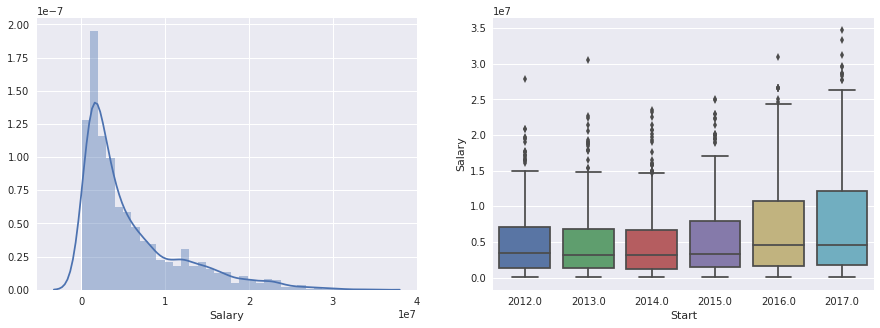

In [23]:
print('Skew:' ,df_salario['Salary'].skew())
print('Kurtosis :',df_salario['Salary'].kurt())

sns.set()
fig,axes=plt.subplots(1,2, figsize=(15,5))
#df_salario['Salary'].hist();
sns.distplot(df_salario['Salary'],ax =axes[0]);
sns.boxplot(df_salario['Start'],df_salario['Salary'],ax =axes[1]);

#df_salario.hist(figsize=(16,20),bins = 50);

Skew: -0.767007520319
Kurtosis : 1.57007732472


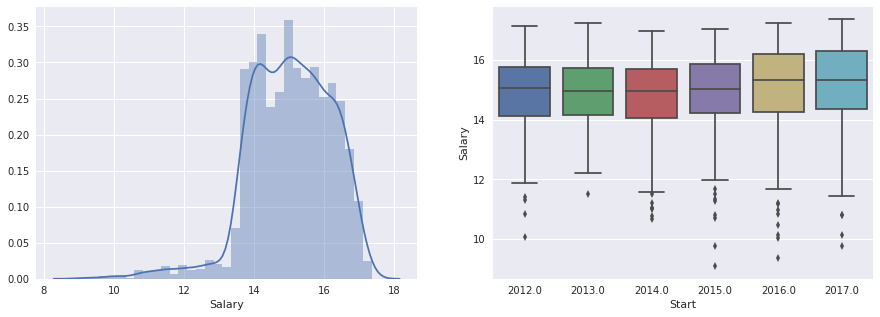

In [50]:
df_salario['Salary']=np.log(df_salario['Salary'])
print('Skew:' ,df_salario['Salary'].skew())
print('Kurtosis :',df_salario['Salary'].kurt())

sns.set()
fig,axes=plt.subplots(1,2, figsize=(15,5))
#df_salario['Salary'].hist();
sns.distplot(df_salario['Salary'],ax =axes[0]);
sns.boxplot(df_salario['Start'],df_salario['Salary'],ax =axes[1]);

#df_salario.hist(figsize=(16,20),bins = 50);

### No gráfico de distribuição acima, vimos que há uma distorção com skew positivo.
### Observando o grafico acima, percebe-se que há uma tendencia de aumento dos salários para faixa acima do 3 quartil (75% range).
### O aumento nas faixas menores (1 e 2 quartil) não está sendo realizado na mesma proporção, levando a uma maior variação entre os salarios ao longo dos anos.

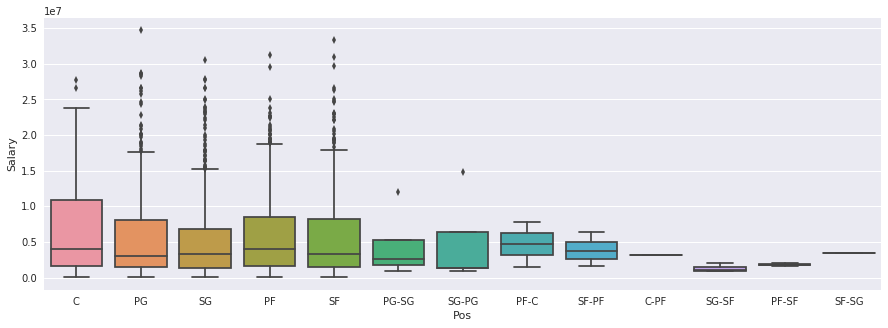

In [24]:
# Salario x Posição
sns.set()
fig, ax=plt.subplots( figsize=(15,5))
#df_salario['Salary'].hist();
sns.boxplot(df_salario['Pos'],df_salario['Salary'],ax= ax);

## Outliers
### Vamos utlizar a tecnica IQR range, no qual mede a dispersão dos dados para criar outro dataframe somente com esse valores 

In [22]:
df_Q1 = df_salario.loc[df_salario.columns !='Salary'].quantile(0.25)
df_Q3 = df_salario.loc[df_salario.columns !='Salary'].quantile(0.75)
IQR = df_Q3 - df_Q1

In [23]:
df_salario_num = df_salario.select_dtypes(include = ['float64'])

In [31]:
df_salario_sem_out = df_salario[~((df_salario_num < (df_Q1 - (1.5 * IQR)))| (df_salario_num > (df_Q3 + (1.5 * IQR)))).any(axis = 1) ].copy()
df_salario_outlier = df_salario[((df_salario_num < (df_Q1 - (1.5 * IQR)))| (df_salario_num > (df_Q3 + (1.5 * IQR)))).any(axis = 1) ].copy()


In [ ]:
df_salario_medio['Salary_log']=np.log1p(df_salario_medio['Salary'])
#df_salario.drop('Salari_log',axis=1,inplace=True)
sns.set()
sns.distplot(df_salario_medio['Salary_log']);

### Observando o grafico acima, percebe-se que há uma tendencia de aumento dos salários para faixa acima do 3 quartil (75% range).
### O aumento nas faixas menores (1 e 2 quartil) não está sendo realizado na mesma proporção, levando a uma maior variação entre os salarios ao longo dos anos.

## Correlação

In [57]:
#Correlação
cor = df_salario.corr()

In [58]:
variaveis = cor[abs(cor['Salary'])>0.4][['Salary']].sort_values(by='Salary',ascending=False).index
#cor[['Salary']].sort_values(by='Salary',ascending=False)['Salary'].reset_index().head(10)

In [59]:
#plt.rcParams["figure.figsize"] = (15,10)

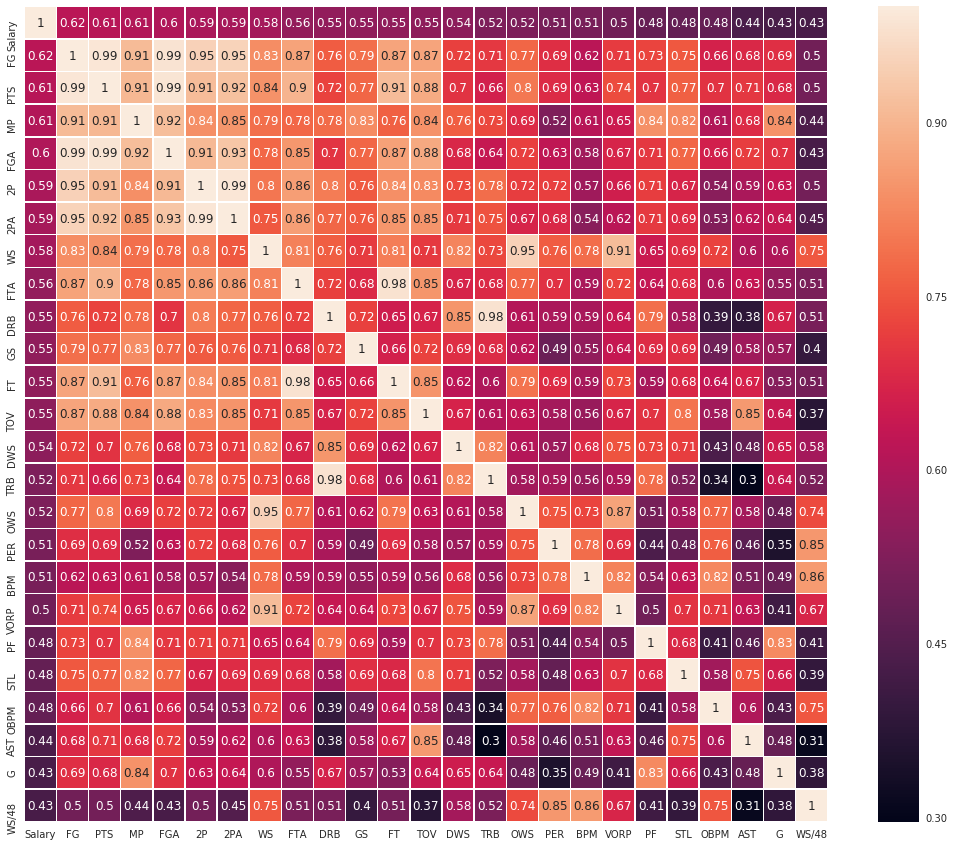

In [60]:
sns.set_style("whitegrid")
#variaveis = ['Salary','WS','VORP','OWS','MP','DWS','Age','BPM','USG%' ,'NBA_DraftNumber']
corr_variaveis = df_salario[variaveis].corr() 
plt.figure(figsize=(18,15))
sns.heatmap(corr_variaveis ,annot = True,linewidths=.5);

## Pairplot
### Verificação de relacionamento das variáveis indenpendentes com a variavel "Salary"

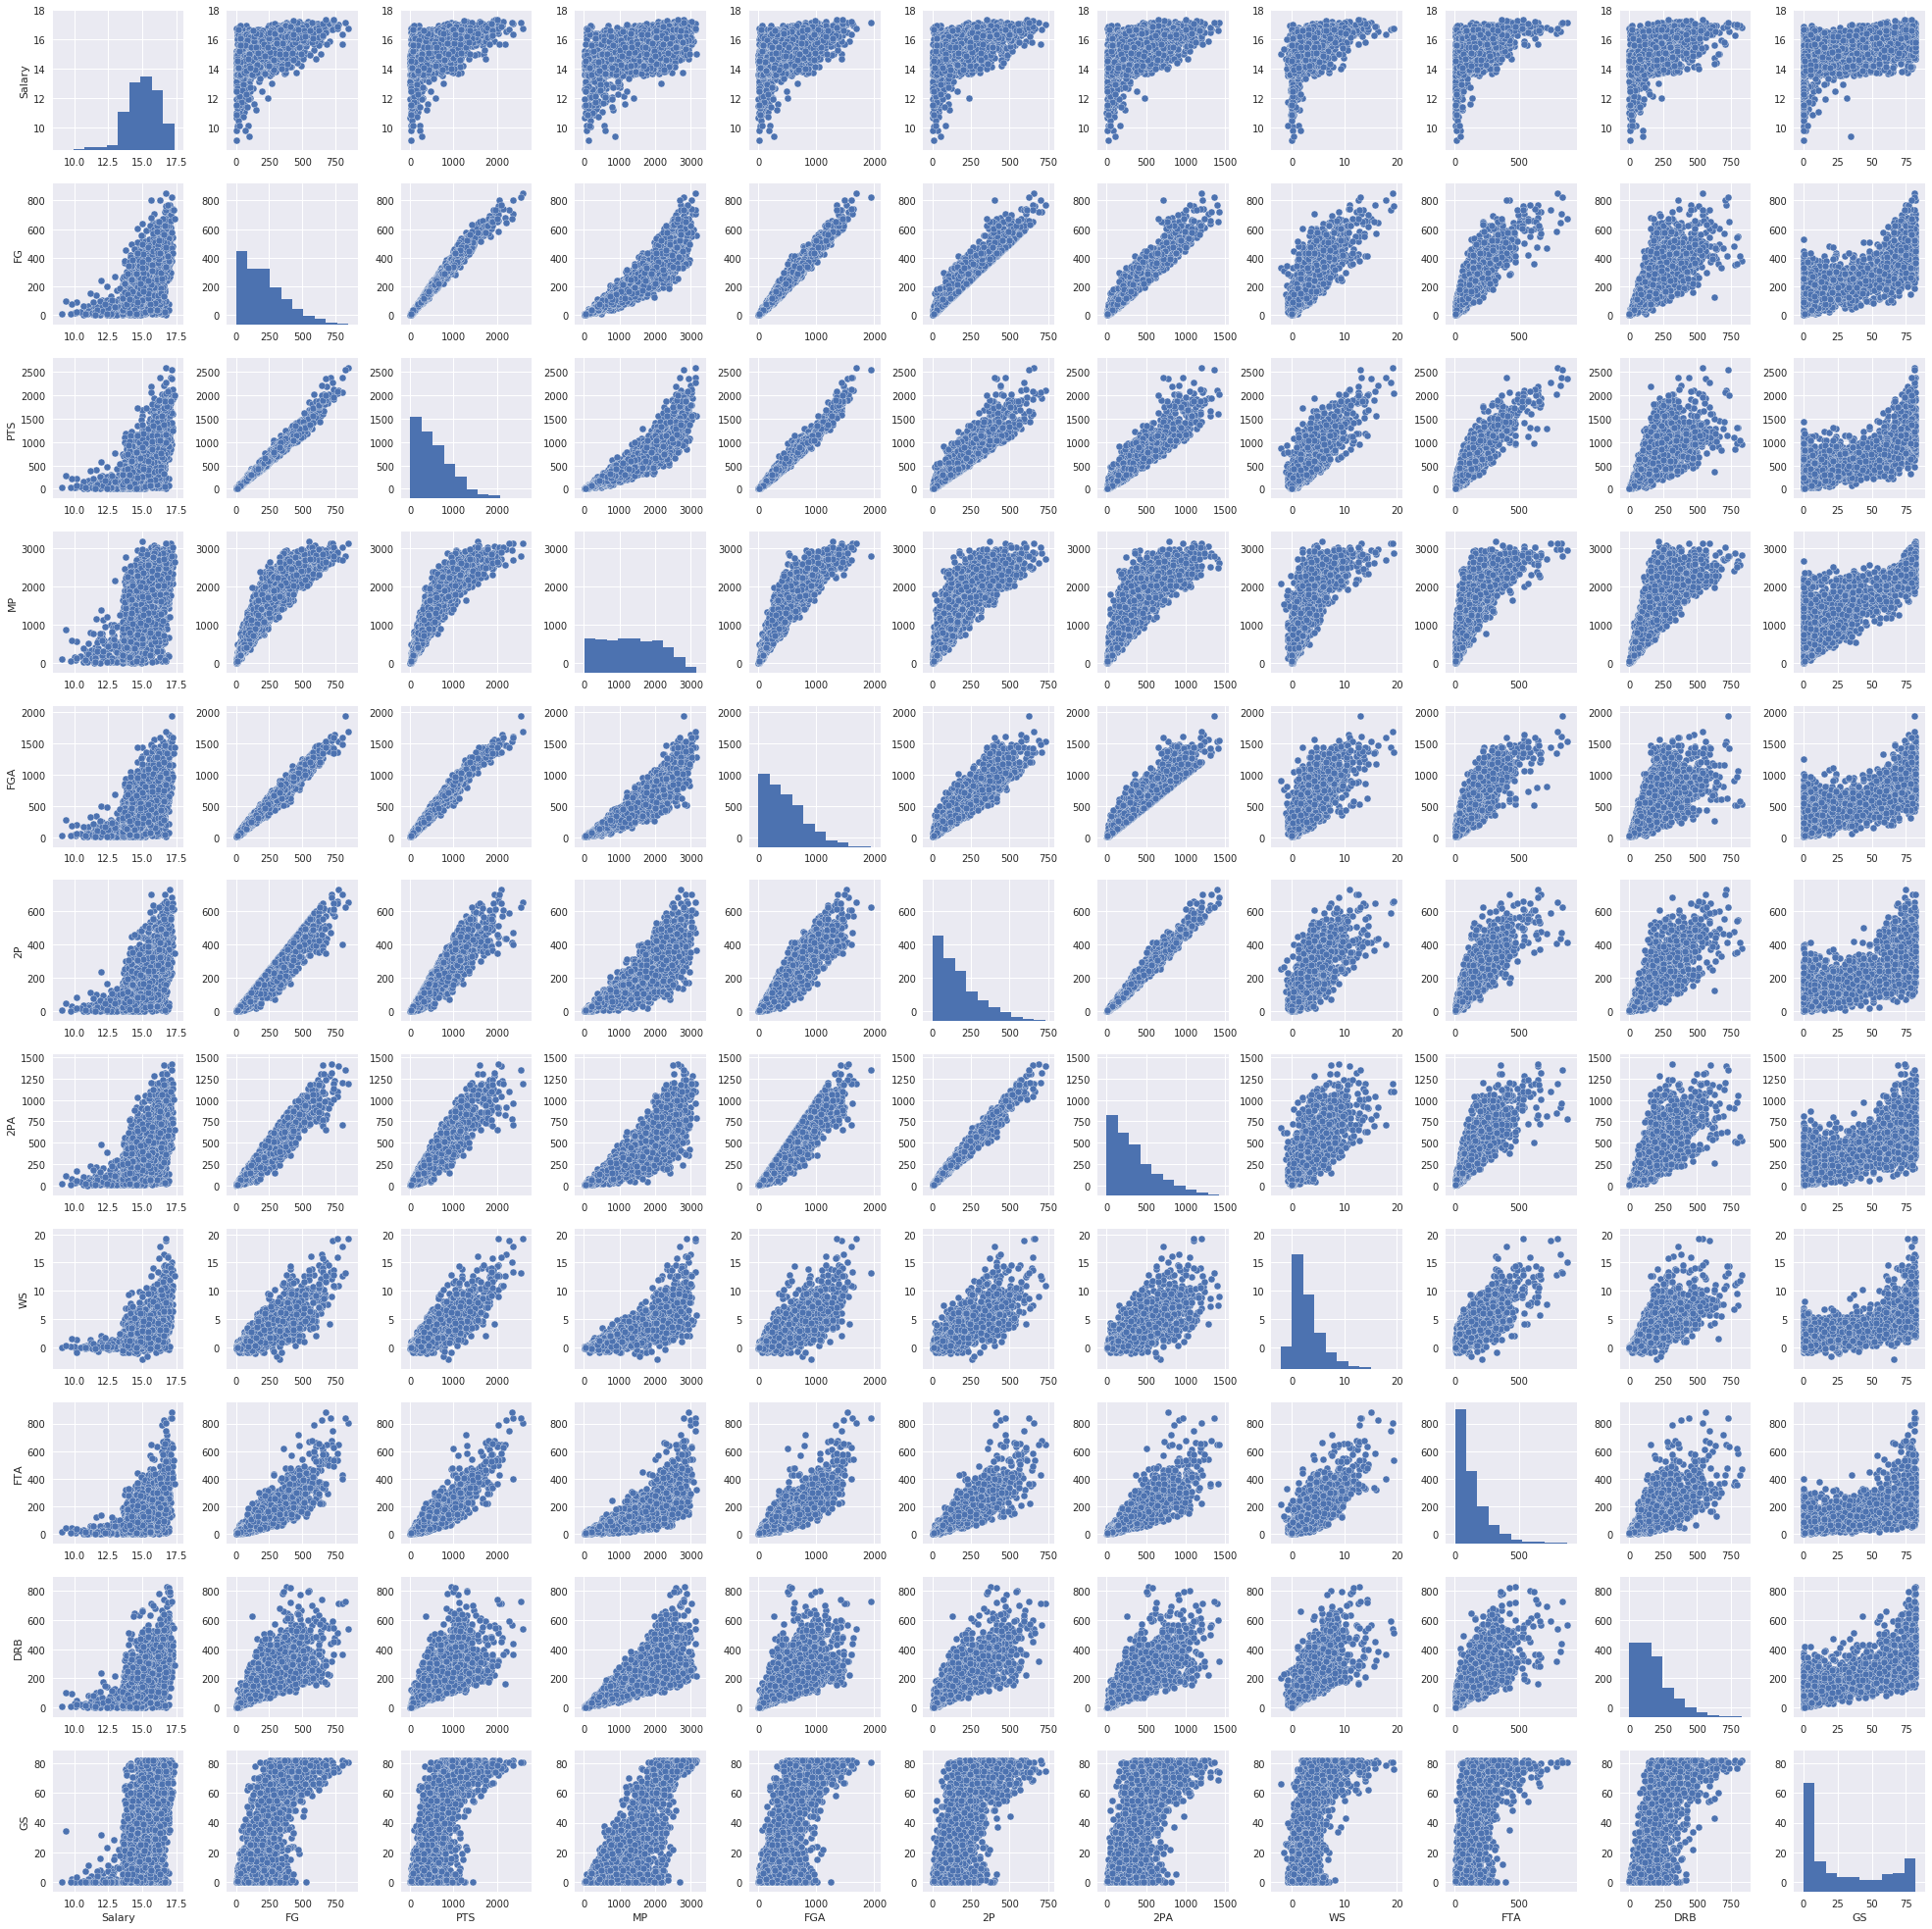

In [63]:
variaveis_corr = cor[abs(cor['Salary'])>0.55][['Salary']].sort_values(by='Salary',ascending=False).index
sns.set()
sns.pairplot(df_salario[variaveis_corr]);

## No gráfico acima, vimos que há algumas variáveis com relacionamento linear quase perfeito (ex: "Pts"-"2P")

## Analise Exploratória

## Dataset NBA Full stats
#### https://www.kaggle.com/whitefero/nba-players-advanced-season-stats-19782016#NBA%20Players%20-%20Basic%20Season%20Stats%20(1950-2017).xlsx
## About BPM
#### https://www.basketball-reference.com/about/bpm.html
## Glossary
#### https://www.basketball-reference.com/about/glossary.html
## Source dataset
https://www.kaggle.com/meicher/201718-advanced-player-metrics-salary

## Normalidade

### Verificando skewness e kurtosis
#### Skew = mede o grau de simetria da distirbuição da variavel:
#####         < 0 - distribuição negativa ou a esquerda  
#####         0 - distrbuição normal 
#####         > 1 - distrbuição positiva ou a direita)

#### kurtosis mede o grau de achatamento da distribuição 
#####         < 0 - é mais alta referente a distrbuição normal  
#####         0 -   possui um achatamento referente a uma distribuição normal 
#####         > 1 - é mais achatada que uma distrbuição normal


In [27]:
for campo in df_salario[variaveis]:
    print('Skew %s'  % campo, df_salario[campo].skew())
    print('Kurtosis %s ' % campo, df_salario[campo].kurt())
    

Skew Salary 1.56301835196
Kurtosis Salary  2.1298947894
Skew PTS 1.07628853574
Kurtosis PTS  1.15593040638
Skew FG 0.910614057948
Kurtosis FG  0.4392151421
Skew WS 1.55943186735
Kurtosis WS  3.29748986928
Skew FTA 1.88127670061
Kurtosis FTA  4.82860916322
Skew 2P 1.09520766677
Kurtosis 2P  0.786412149746
Skew FT 2.09059401222
Kurtosis FT  6.36484021796
Skew FGA 0.861451261261
Kurtosis FGA  0.312144029478
Skew 2PA 1.05137697551
Kurtosis 2PA  0.656540308137
Skew VORP 2.36585062571
Kurtosis VORP  8.65974332517
Skew OWS 1.94602726475
Kurtosis OWS  5.61233714201
Skew GS 0.604261609646
Kurtosis GS  -1.1824565902
Skew TOV 1.33295565708
Kurtosis TOV  2.62764878052
Skew DRB 1.27682333069
Kurtosis DRB  1.93811761161
Skew MP 0.13650549096
Kurtosis MP  -1.0233525832
Skew PER 0.331528323536
Kurtosis PER  0.957683725461
Skew DWS 1.13326227857
Kurtosis DWS  1.21528023254
Skew TRB 1.37573645677
Kurtosis TRB  2.30220273905
Skew BPM -0.236831904427
Kurtosis BPM  2.87640389338
Skew OBPM -0.0451419095988


## Preparação do dataset para criação do modelo

In [80]:
#Criação das variaveis dummies
df_salario_pos = pd.get_dummies(df_salario['Pos'],drop_first=True)

In [128]:
df_modelo.shape

(2277, 60)

In [127]:
#df_salario.drop(['Player','Pos'],axis=1,inplace=True)
df_modelo = df_salario.merge(df_salario_pos,left_index =True,right_index=True, how='inner')

In [111]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Criação do Modelo
### 1 - OLS
### Vamos criar esse primeiro modelo sem nenhum tipo de transformação e tambem sem criação de novas variáveis, apenas utilizando as variaveis com maior grau de correlaçao em relação ao salário


In [28]:
#variaveis.remove('Salary')

df_salario_ols = df_salario[variaveis]

#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [29]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     78.81
Date:                Sat, 12 Jan 2019   Prob (F-statistic):          8.71e-240
Time:                        21:46:53   Log-Likelihood:                -28448.
No. Observations:                1707   AIC:                         5.694e+04
Df Residuals:                    1684   BIC:                         5.707e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.731e+06    1.2e+06      1.442      0.149   -6.23e+05    4.09e+06
PTS         1.884e+04   7316.673      2.575      0.010    4488.048    3.32e+04
FG          1.241e+04   2314.111      5.364      0.000    7874.137     1.7e+04
WS         -4.275e+06   2.13e+06     -2.010      0.045   -8.45e+06   -1.02e+05
FTA         6237.8157   6164.463      1.012      0.312   -5853.001    1.83e+04
2P          2.174e+04   1.24e+04      1.750      0.080   -2629.838    4.61e+04
FT          3338.9685   8718.288      0.383      0.702   -1.38e+04    2.04e+04
FGA         -1.48e+04   8365.550     -1.769      0.077   -3.12e+04    1610.724
2PA        -1.585e+04   7308.037     -2.168      0.030   -3.02e+04   -1512.637
VORP       -3.648e+05   3.36e+05     -1.087      0.277   -1.02e+06    2.94e+05
OWS         3.601e+06   2.14e+06      1.682      0.093   -5.97e+05     7.8e+06
GS          4.384e+04   6861.719      6.389      0.000    3.04e+04    5.73e+04
TOV        -5.818e+04   9828.752     -5.919      0.000   -7.75e+04   -3.89e+04
DRB         5731.4956   6493.066      0.883      0.378   -7003.833    1.85e+04
MP         -1954.9706    760.454     -2.571      0.010   -3446.504    -463.437
PER         8.123e+04   1.19e+05      0.685      0.494   -1.52e+05    3.14e+05
DWS         5.341e+06   2.13e+06      2.502      0.012    1.15e+06    9.53e+06
TRB         1940.1429   5230.270      0.371      0.711   -8318.371    1.22e+04
BPM         5.466e+05   1.31e+05      4.186      0.000     2.9e+05    8.03e+05
OBPM        -9.11e+04   1.39e+05     -0.653      0.514   -3.65e+05    1.82e+05
AST         2.229e+04   3388.665      6.578      0.000    1.56e+04    2.89e+04
STL        -4.088e+04   7887.401     -5.183      0.000   -5.63e+04   -2.54e+04
USG%        1.387e+05   7.29e+04      1.903      0.057   -4245.171    2.82e+05
WS/48      -1.919e+07   8.01e+06     -2.397      0.017   -3.49e+07   -3.49e+06
==============================================================================
Omnibus:                      238.299   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.115
Skew:                           0.836   Prob(JB):                    2.27e-107
Kurtosis:                       5.028   Cond. No.                     1.43e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
#retira as 5 variaveis com maiores valore de p-value
#X_train.columns
variaveis_modelo=variaveis.drop(['FT','TRB','OBPM','PER','FTA']) 
variaveis_modelo

Index(['Salary', 'PTS', 'FG', 'WS', '2P', 'FGA', '2PA', 'VORP', 'OWS', 'GS',
       'TOV', 'DRB', 'MP', 'DWS', 'BPM', 'AST', 'STL', 'USG%', 'WS/48'],
      dtype='object')

In [47]:
df_salario_ols = df_salario[variaveis_modelo]

#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [48]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sat, 12 Jan 2019   Prob (F-statistic):          1.18e-254
Time:                        22:31:49   Log-Likelihood:                -28434.
No. Observations:                1707   AIC:                         5.691e+04
Df Residuals:                    1688   BIC:                         5.701e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.623e+06   9.64e+05      1.682      0.093   -2.69e+05    3.51e+06
PTS         2.714e+04   3890.374      6.975      0.000    1.95e+04    3.48e+04
FG         -4.004e+04   1.65e+04     -2.434      0.015   -7.23e+04   -7768.945
WS         -2.309e+06   2.13e+06     -1.082      0.279   -6.49e+06    1.88e+06
2P          4.876e+04   1.67e+04      2.927      0.003    1.61e+04    8.14e+04
FGA        -6731.2865   7500.832     -0.897      0.370   -2.14e+04    7980.623
2PA        -1.915e+04   7049.049     -2.717      0.007    -3.3e+04   -5325.104
VORP       -2.308e+05   3.25e+05     -0.711      0.477   -8.68e+05    4.06e+05
OWS         1.795e+06   2.14e+06      0.839      0.402    -2.4e+06    5.99e+06
GS          4.461e+04   6915.261      6.451      0.000     3.1e+04    5.82e+04
TOV         -5.63e+04   8061.837     -6.983      0.000   -7.21e+04   -4.05e+04
DRB         6644.2121   1939.537      3.426      0.001    2840.061    1.04e+04
MP         -1540.4134    718.198     -2.145      0.032   -2949.065    -131.761
DWS         3.599e+06   2.13e+06      1.690      0.091   -5.79e+05    7.78e+06
BPM         4.369e+05   1.08e+05      4.047      0.000    2.25e+05    6.49e+05
AST          1.97e+04   2475.784      7.957      0.000    1.48e+04    2.46e+04
STL        -3.876e+04   7297.017     -5.312      0.000   -5.31e+04   -2.45e+04
USG%        1.705e+05   4.12e+04      4.142      0.000    8.97e+04    2.51e+05
WS/48      -1.761e+07   5.13e+06     -3.434      0.001   -2.77e+07   -7.55e+06
==============================================================================
Omnibus:                      218.044   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.503
Skew:                           0.779   Prob(JB):                     8.16e-97
Kurtosis:                       4.948   Cond. No.                     9.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

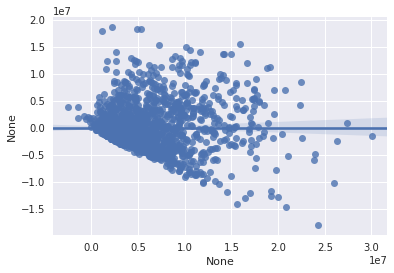

In [62]:
sns.regplot(x= model.fittedvalues,y=model.resid)

### No grafico acima, há uma espécie de formação de cone.
## Na regressão linear, os residuos não devem ter correlaçao com os valores previstos. Nesse caso uma alternativa para este problema seria transformar a variavel dependente, ou seja a coluna "salary" com a raiz quadrada ou o log 


In [67]:
df_salario_ols = df_salario[variaveis_modelo].copy()
df_salario_ols['Salary'] = np.sqrt(df_salario_ols['Salary']) 
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [68]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     87.07
Date:                Sat, 12 Jan 2019   Prob (F-statistic):          7.60e-234
Time:                        22:39:37   Log-Likelihood:                -13843.
No. Observations:                1707   AIC:                         2.773e+04
Df Residuals:                    1687   BIC:                         2.784e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1241.4581    190.593      6.514      0.000     867.635    1615.281
PTS            3.0108      1.606      1.875      0.061      -0.139       6.161
FG            -1.2832      5.019     -0.256      0.798     -11.128       8.561
WS          -843.7334    402.892     -2.094      0.036   -1633.955     -53.512
FTA            0.8820      1.080      0.817      0.414      -1.236       3.000
2P             3.0708      3.707      0.828      0.408      -4.200      10.342
FGA           -1.1531      1.507     -0.765      0.444      -4.109       1.803
2PA           -1.8223      1.406     -1.296      0.195      -4.580       0.935
VORP        -163.8510     68.192     -2.403      0.016    -297.601     -30.101
OWS          800.2057    404.606      1.978      0.048       6.624    1593.787
GS             7.5207      1.322      5.690      0.000       4.928      10.113
TOV           -8.2253      1.633     -5.038      0.000     -11.427      -5.023
DRB            0.4558      0.424      1.074      0.283      -0.376       1.288
MP            -0.1116      0.138     -0.811      0.418      -0.382       0.158
PER           59.6713     14.392      4.146      0.000      31.443      87.900
DWS         1200.9535    402.725      2.982      0.003     411.060    1990.847
BPM           97.2580     22.345      4.353      0.000      53.431     141.085
AST            2.7709      0.503      5.509      0.000       1.784       3.757
STL           -8.9263      1.474     -6.054      0.000     -11.818      -6.035
WS/48      -5654.8718   1227.798     -4.606      0.000   -8063.040   -3246.704
==============================================================================
Omnibus:                       63.303   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.502
Skew:                           0.436   Prob(JB):                     1.09e-16
Kurtosis:                       3.524   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

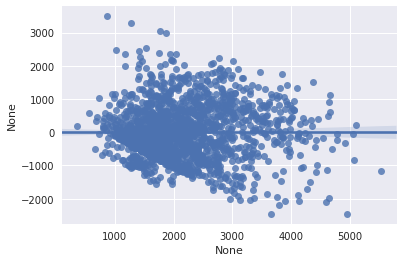

In [70]:
sns.regplot(x= model.fittedvalues,y=model.resid)

## Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [72]:
modelo_reg = LinearRegression()
score = cross_val_score(modelo_reg,df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'],cv= 5)

In [73]:
score.mean()

0.49425327033382976

## Ridge e Lasso

In [90]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV


In [94]:
df_modelo.columns

Index(['Start', 'Salary', 'Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'C-PF',
       'PF-C', 'PF-SF', 'PG', 'PG-SG', 'SF', 'SF-PF', 'SF-SG', 'SG', 'SG-PG',
       'SG-SF'],
      dtype='object')

In [133]:
#df_salario_ols = df_modelo[variaveis].copy()
#df_salario_ols['Salary'] = np.sqrt(df_salario_ols['Salary']) 
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_modelo.loc[:,df_modelo.columns !='Salary'],df_modelo.loc[:,'Salary'])

In [134]:
reg = RidgeCV(alphas=[0.1, 1.0, 10.0,20.0], cv=10,normalize=True,fit_intercept=True).fit(X_train,y_train)       
reg.score(X_train,y_train)


0.57276344469114626

In [135]:
reg.alpha_

0.1

In [136]:
reg = RidgeCV(alphas=[-0.3, -0.2,-0.1 , 0.1, 0.2, 0.3, 0.4, 0.5], cv=10,normalize=True,fit_intercept=True).fit(X_train,y_train)       
reg.score(X_train,y_train)


0.57276344469114626

In [137]:
y_pred = reg.predict(X_test)
rmse(y_pred,y_test)

3723681.5953011587

In [99]:
reg.alpha_

0.1

In [141]:
for i in range(0,len(reg.coef_)):
    print(X_train.columns[i],reg.coef_[i])

Start 522413.574143
Age 208377.748276
G -50608.8856592
GS 24108.9714945
MP 472.531352651
PER 42924.1353448
TS% -6730366.84179
3PAr -891991.885962
FTr 31016.0464051
ORB% -46997.1243882
DRB% 10373.0887712
TRB% -6130.26647546
AST% 7474.75819523
STL% -424226.315668
BLK% -65572.0464504
TOV% 54239.3224188
USG% 114640.758818
OWS 182196.312303
DWS 456759.709064
WS 152146.770017
WS/48 -527976.831315
OBPM 135912.475962
DBPM 74873.8743885
BPM 123667.87821
VORP -126647.757403
FG 2063.83544467
FGA 673.11572561
FG% 1984057.37021
3P 3467.72962574
3PA 2301.6111612
3P% 8044.36699832
2P 2266.67559872
2PA 499.757177615
2P% 911837.552618
eFG% -1073047.3668
FT 1602.85524878
FTA 4329.40398173
FT% -1454197.15732
ORB 235.097969083
DRB 2106.23529987
TRB 1119.84083544
AST 2245.83868475
STL -11976.1495521
BLK 9510.44773456
TOV -1536.87341423
PF_x -13272.2697664
PTS 679.269443901
C-PF -1679317.64466
PF_y -133526.473323
PF-C -264511.542833
PF-SF -1724944.77625
PG -1149974.65127
PG-SG 914940.196456
SF 81682.8867891

## Lasso

In [114]:
cols_nums=df_salario.select_dtypes(include=['float']).columns

In [142]:
#df_salario_ols = df_salario[cols_nums].copy()
#df_salario_ols['Salary'] = np.sqrt(df_salario_ols['Salary']) 
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_modelo.loc[:,df_modelo.columns !='Salary'],df_modelo.loc[:,'Salary'])

In [147]:
lasso = LassoCV(alphas=[0.01,0.05,0.1,1.0, 10.0,20.0,30.0,50.0], cv=10,normalize=True,fit_intercept=True).fit(X_train,y_train)       
lasso.score(X_train,y_train)


/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5962851363819317

In [150]:
y_pred = lasso.predict(X_test)
rmse(y_pred,y_test)

3988707.1621120158

In [148]:
lasso.alpha_

50.0

In [149]:
for i in range(0,len(lasso.coef_)):
    print(X_train.columns[i],lasso.coef_[i])

Start 716861.145885
Age 199638.294834
G -86713.2849056
GS 19673.7554722
MP 1256.67490864
PER -216279.956178
TS% -21408590.0478
3PAr -4876434.45953
FTr -1072074.60322
ORB% -173084.664584
DRB% 5987.4353079
TRB% -0.0
AST% -90444.8314996
STL% -384351.059229
BLK% 129612.902008
TOV% 199334.257956
USG% 223450.93813
OWS 446403.442617
DWS 1689901.03104
WS 0.0
WS/48 -2139112.39067
OBPM 965831.476975
DBPM -0.0
BPM 181362.272878
VORP -1386645.56369
FG 15411.0312519
FGA -777.910427316
FG% 5432051.5408
3P -3953.62553884
3PA 3809.89133768
3P% 453707.086483
2P 6713.89500044
2PA -9960.84768067
2P% -742007.566165
eFG% -0.0
FT -4676.72019884
FTA 13786.4742819
FT% 660407.2909
ORB 11567.2273189
DRB 4879.96529356
TRB 425.795543293
AST 15206.5781529
STL -11684.0043539
BLK 4124.30006832
TOV -18078.3586822
PF_x -25235.9063626
PTS 0.0
C-PF -545253.030261
PF_y -191644.966813
PF-C -62759.9073675
PF-SF -1353163.74302
PG -2697292.27795
PG-SG -403145.560378
SF -438268.201598
SF-PF -617900.320207
SF-SG -879544.874078

## Adicionando termo de interação

In [152]:
df_salario_ols = df_salario[cols_nums].copy()
df_salario_ols['Salary'] = np.sqrt(df_salario_ols['Salary']) 
df_salario_ols['2P_X_BPM'] = df_salario_ols['2P%'] * df_salario_ols['BPM']
df_salario_ols['Start_X_BPM'] = df_salario_ols['Start'] * df_salario_ols['BPM']
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [106]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     79.74
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          6.16e-242
Time:                        22:28:01   Log-Likelihood:                -13816.
No. Observations:                1707   AIC:                         2.768e+04
Df Residuals:                    1684   BIC:                         2.780e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1076.6044    186.891      5.761      0.000     710.042    1443.167
PTS           -0.7589      1.182     -0.642      0.521      -3.078       1.560
FG             0.9136      0.434      2.104      0.036       0.062       1.765
WS         -1160.1981    408.044     -2.843      0.005   -1960.526    -359.871
FTA            1.3523      1.200      1.127      0.260      -1.002       3.706
2P             4.0676      2.378      1.711      0.087      -0.596       8.732
FT             0.5679      1.706      0.333      0.739      -2.779       3.915
FGA            2.6040      1.363      1.910      0.056      -0.070       5.278
2PA           -2.3095      1.394     -1.656      0.098      -5.045       0.426
VORP          59.6835     93.936      0.635      0.525    -124.559     243.926
OWS         1266.8728    408.029      3.105      0.002     466.575    2067.170
GS            15.0000      2.345      6.397      0.000      10.401      19.599
TOV            0.0548      0.942      0.058      0.954      -1.792       1.902
DRB            5.3984      1.098      4.918      0.000       3.245       7.551
MP            -0.5828      0.151     -3.853      0.000      -0.880      -0.286
PER           13.2310     12.435      1.064      0.287     -11.158      37.620
DWS         1243.5647    408.599      3.043      0.002     442.149    2044.980
TRB           -3.2906      0.782     -4.207      0.000      -4.825      -1.756
BPM           -0.9641     20.171     -0.048      0.962     -40.527      38.598
PTS_X_BPM      0.0015      0.041      0.038      0.970      -0.078       0.081
GS_X_BPM       0.6618      0.572      1.158      0.247      -0.460       1.783
GS_X_PTS      -0.0114      0.003     -4.468      0.000      -0.016      -0.006
VORP_X_WS    -15.7338      5.036     -3.124      0.002     -25.610      -5.857
BPM_X_PER      1.0206      1.406      0.726      0.468      -1.737       3.778
==============================================================================
Omnibus:                       72.540   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.124
Skew:                           0.447   Prob(JB):                     2.69e-20
Kurtosis:                       3.683   Cond. No.                     1.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.41e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [153]:
lasso = LassoCV(alphas=[0.01,0.05,0.1, 0.5, 1.0, 10.0,20.0], cv=10,normalize=True,fit_intercept=True).fit(X_train,y_train)       
lasso.score(X_train,y_train)


/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.59360245505579323

In [154]:
lasso.alpha_

0.01

In [155]:
for i in range(0,len(lasso.coef_)):
    print(X_train.columns[i],lasso.coef_[i])

Start 137.880937393
Age 40.2707852663
G -18.9548630878
GS 0.919831305056
MP 0.810179382262
PER -9.03170905512
TS% -2745.40111469
3PAr -947.663111578
FTr -443.349319488
ORB% -20.1457207029
DRB% 11.1700575015
TRB% -0.0
AST% -30.4298741314
STL% -230.606093722
BLK% -13.9839355645
TOV% 33.4013376802
USG% 61.3735407237
OWS 119.497329736
DWS 292.954226258
WS -0.0
WS/48 -1965.72161055
OBPM 135.217378454
DBPM -0.0
BPM 1.31136762591
VORP -345.347064265
FG 1.08482845863
FGA -0.364129522552
FG% 0.0
3P -0.691521598289
3PA 0.0724841491046
3P% -66.6584073177
2P 1.92441697893
2PA -2.03729480791
2P% 53.7530526352
eFG% -488.08561715
FT -0.594730874984
FTA 1.41876842518
FT% -186.348930224
ORB -0.0
DRB 0.568647972575
TRB 0.0
AST 1.70481248656
STL 0.961288272949
BLK 0.687867954
TOV -1.3694205701
PF -2.95293522415
PTS 0.0
2P_X_BPM 63.9866142331
Start_X_BPM 0.0487702589897


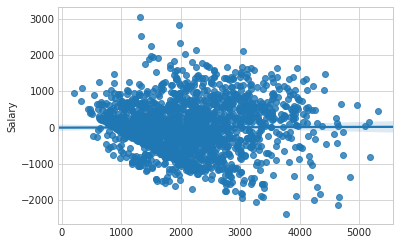

In [156]:
sns.regplot(lasso.predict(X_train) ,(y_train - lasso.predict(X_train)));

## VIF - Variance Inflation Factor

### Metodo utilizado para identificar multicolinearidade

In [55]:
cnames = X_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(X_train[yvar],sm.add_constant( X_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

2P 101.783
FGA 28.16
2PA 115.324
OWS 4.276
GS 3.589
DRB 51.964
MP 11.694
DWS 4.774
TRB 48.68
BPM 2.678
